In [ ]:
k=2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA
from numpy import save
from numpy import load

connect drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**fetching data**

[0.67436247] [-0.44462513]


<function matplotlib.pyplot.show(*args, **kw)>

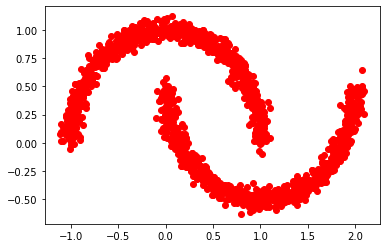

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ml/Assignment5Dataset.csv")
data.head()
x_old = data[["X1"]].values
y_old=data[["X2"]].values

print(x_old[0],y_old[0])
data_size=1500

for p in range(0,data_size):
  plt.scatter(x_old[p],y_old[p],c="red")

plt.show

**euclidian distance**

In [ ]:
from numpy import save
from numpy import load

In [ ]:
data=load('/content/drive/MyDrive/iisc/random_house_data.npy')

In [ ]:
data=pd.DataFrame(data)
print(data)
data_size=len(data)

             0         1
0     2.541501  0.057059
1     1.372917 -1.742211
2     1.142263 -1.738709
3     0.513272 -0.343188
4    -1.146951 -0.767431
...        ...       ...
3995  0.065532 -0.753915
3996  1.854860 -0.156290
3997  1.356891  0.951874
3998  0.480375 -0.432025
3999  1.500710  0.912678

[4000 rows x 2 columns]


In [ ]:
def distance(p1,p2):


  return LA.norm(p1-p2)

In [ ]:
data.loc[[0]]

,0,1
0,2.541501,0.057059


**distance of each point from each point is stored in** euclid matrix

In [ ]:
euclid= np.zeros([data_size,data_size])
points =data.values
for i in range(data_size):
    print(i)
    for j in range(i + 1, data_size):
        point1 = points[i]
        point2 = points[j]
        dis = np.linalg.norm(point1 - point2)  # Euclidean distance calculation on GPU
        euclid[i][j] = dis
        euclid[j][i] = dis

In [ ]:
save('/content/drive/MyDrive/iisc/house_distance.npy', euclid)

In [ ]:
distance=load('/content/drive/MyDrive/iisc/house_distance.npy')

**creating weight** by epsilon neighbour

In [ ]:

w= np.zeros([data_size,data_size], dtype = int)
min_distance=0.09


for i in range(0,data_size):
  for j in range(i+1,data_size):
    if(distance[i][j]<min_distance):
      w[i][j]=1
      w[j][i]=1


**Laplacian matrix creation**

In [ ]:

D= np.zeros([data_size, data_size], dtype = int)
for i in range(0,data_size):
  tmp=0
  for j in range(0,data_size):
    tmp+=w[i][j]
  D[i][i]=tmp
L=D-w
print(L)



[[13  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0  7 ...  0  0  0]
 ...
 [ 0  0  0 ... 14  0  0]
 [ 0  0  0 ...  0  2  0]
 [ 0  0  0 ...  0  0  6]]


**eign vector matrix of Laplacian creation**

In [ ]:
k=4

In [ ]:
eignval,eignvector = np.linalg.eig(L)
df1 = pd.DataFrame(eignvector)

df1=df1.transpose()
df1.insert(loc=0,column='eignval',value=eignval)

df1.sort_values(by=["eignval"], inplace = True)




In [ ]:

Q=df1.iloc[0:k,1:].transpose()

In [ ]:
Q=np.real(Q)
print(Q)

[[ 0.00138303 -0.00383395 -0.00130991  0.00061327]
 [-0.00306304  0.00283975 -0.00509844  0.01239156]
 [-0.00306304  0.00283975 -0.00509844  0.01239156]
 ...
 [ 0.00858191  0.00769179  0.01013607  0.01112231]
 [ 0.00138303 -0.00383395 -0.00130991  0.00061327]
 [ 0.00858191  0.00769179  0.01013607  0.01112231]]


plotting Q matrix data point row wise

In [ ]:
from sklearn.cluster import KMeans
model= KMeans(n_clusters=4,random_state=10)
cluster_kmeans=model.fit_predict(Q)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
labels = model.labels_
print(labels.shape)

(4000,)


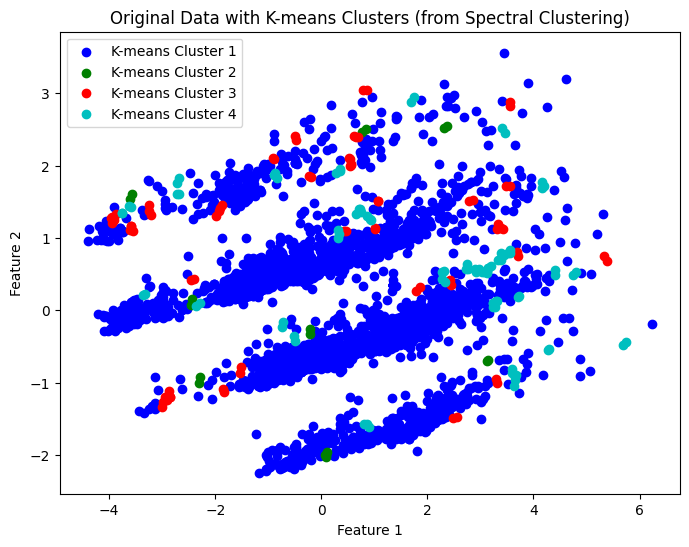

In [ ]:


# Get cluster centers


# Plot the data points with different colors for each cluster
plt.figure(figsize=(8, 6))

# Define colors for plotting
colors = ['b', 'g', 'r', 'c', 'm', 'y']
k=4
for i in range(k):
    cluster_points = data[labels == i]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], c=colors[i], label=f'K-means Cluster {i + 1}')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data with K-means Clusters (from Spectral Clustering)')
plt.legend()
plt.show()







In [ ]:
x = Q[[0]].values
y=Q[[1]].values

for p in range(0,data_size):
  plt.scatter(x[p],y[p],c="red")

plt.show

KeyError: ignored

# **Kmeans** applying

Euclidian distance function

In [ ]:
def distance(p1,p2):


  return np.dot((p1-p2).transpose(),(p1-p2))

kmeans code

In [ ]:

mean=[]
indexing=[]
for i in range(0,k):
  j=random.randint(0, data_size)

  mean.append((Q.loc[[j]]).values.transpose())
A = np.zeros([data_size, k], dtype = int)
for p in range(0,data_size):
  point=(Q.loc[[p]]).values.transpose()
  d=[]
  for i in range(0,k):
    d.append(distance(point,mean[i]).tolist())
  ind=d.index(min(d))
  indexing.append(ind)
  A[p][ind]=1


flag=True

while flag:
  A_new = np.zeros([data_size, k], dtype = int)
  for i in range(0,k):
    n=0
    for p in range(0,data_size):
      mean[i]+=A[p][i]*(Q.loc[[p]]).values.transpose()
      n+=A[p][i]
    mean[i]=mean[i]/n

  for p in range(0,data_size):
    point=(Q.loc[[p]]).values.transpose()
    d=[]
    for i in range(0,k):
      d.append(distance(point,mean[i]).tolist())
    ind=d.index(min(d))
    indexing[p]=ind
    A_new[p][ind]=1
  if np.array_equal(A, A_new):
    flag=False
  A=A_new
print(len(indexing))




1500


**Indexing[]** array contain which point belong to which cluster

<function matplotlib.pyplot.show(*args, **kw)>

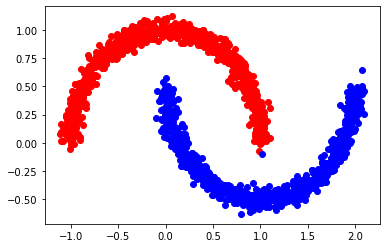

In [ ]:
color=["red","blue","yellow"]

for p in range(0,data_size):
  plt.scatter(x_old[p],y_old[p],c=color[indexing[p]])





plt.show
